# Dataset


In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')

In [2]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Preprocessing

In [5]:
x = df.drop('HeartDisease', axis='columns')
y = df['HeartDisease']

In [6]:
from sklearn.preprocessing import LabelEncoder
x = x.apply(LabelEncoder().fit_transform)

In [7]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


In [8]:
from sklearn.model_selection import  train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [9]:
import numpy as np
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Definition

In [11]:
import tensorflow as tf
from tensorflow import keras

In [12]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(11,)))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.binary_crossentropy, metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               1

In [14]:
hist = model.fit(x_train, y_train, epochs=200, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/200
6/6 [==============================] - 2s 90ms/step - loss: 0.6632 - accuracy: 0.6022 - val_loss: 0.6301 - val_accuracy: 0.6196
Epoch 2/200
6/6 [==============================] - 0s 13ms/step - loss: 0.6142 - accuracy: 0.6594 - val_loss: 0.5497 - val_accuracy: 0.7935
Epoch 3/200
6/6 [==============================] - 0s 13ms/step - loss: 0.5417 - accuracy: 0.7643 - val_loss: 0.4795 - val_accuracy: 0.7609
Epoch 4/200
6/6 [==============================] - 0s 17ms/step - loss: 0.4698 - accuracy: 0.8120 - val_loss: 0.4385 - val_accuracy: 0.7663
Epoch 5/200
6/6 [==============================] - 0s 20ms/step - loss: 0.4455 - accuracy: 0.8134 - val_loss: 0.4397 - val_accuracy: 0.7826
Epoch 6/200
6/6 [==============================] - 0s 21ms/step - loss: 0.3981 - accuracy: 0.8215 - val_loss: 0.4142 - val_accuracy: 0.8043
Epoch 7/200
6/6 [==============================] - 0s 18ms/step - loss: 0.3887 - accuracy: 0.8433 - val_loss: 0.4022 - val_accuracy: 0.8152
Epoch 8/200
6/6 [===

# Plot

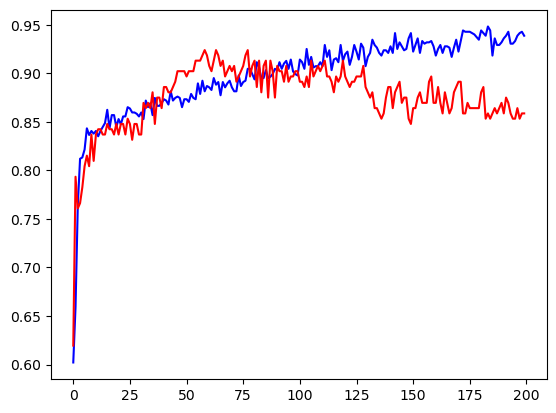

In [15]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], color='blue')
plt.plot(hist.history['val_accuracy'], color='red')

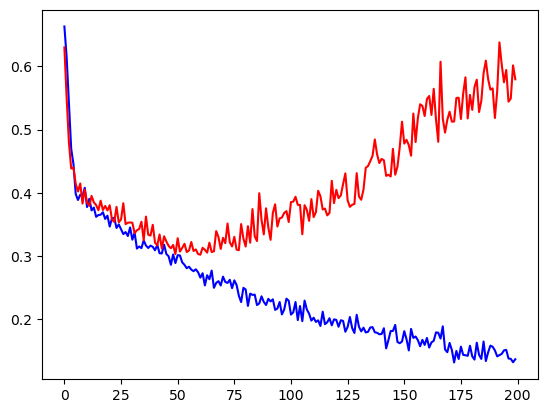

In [16]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], color='blue')
plt.plot(hist.history['val_loss'], color='red')